
Raw dataset (first 20 rows):
   group gender  has_license
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            1
Group A    men            0
Group A    men            0

Proportion summary:
   group gender  proportion  percent
Group A    men    0.720000    72.00
Group A  women    0.628571    62.86
Group B    men    0.400000    40.00
Group B  women    0.533333    53.33
Group C    men    0.700000    70.00
Group C  women    0.450000    45.00


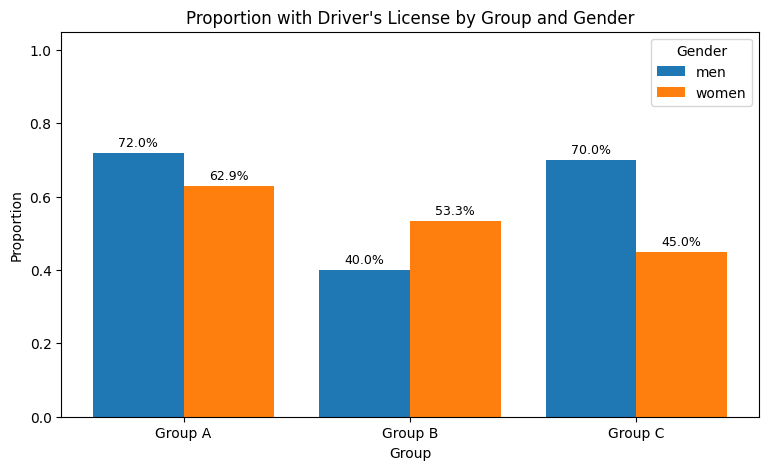

('/mnt/data\\driver_license.csv', '/mnt/data\\req9_license_proportion.png')

In [1]:
# === REQUIREMENT 9 — ONE-CELL, SELF-CONTAINED (JUPYTER) ===
# Goal: Plot the proportion of men and women in each group that HAS a driver's license.
# Constraints satisfied:
#  - Store data to CSV and display it
#  - Compute proportions correctly per (group, gender)
#  - Plot a categorical-style grouped bar chart (Matplotlib only, no seaborn)
#  - Save plot to file
#
# You can EDIT the counts in the DATA_COUNTS dict below to use your real team data.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 0) Define/EDIT dataset (counts -> expanded rows) ----------
# Format: DATA_COUNTS[group][gender] = (count_has_license, count_no_license)
DATA_COUNTS = {
    "Group A": {"men": (18, 7), "women": (22, 13)},
    "Group B": {"men": (10, 15), "women": (16, 14)},
    "Group C": {"men": (14, 6), "women": (9, 11)},
}

rows = []
for group, genders in DATA_COUNTS.items():
    for gender, (cnt_yes, cnt_no) in genders.items():
        rows += [{"group": group, "gender": gender, "has_license": 1} for _ in range(cnt_yes)]
        rows += [{"group": group, "gender": gender, "has_license": 0} for _ in range(cnt_no)]

df = pd.DataFrame(rows, columns=["group", "gender", "has_license"])

# ---------- 1) Save CSV + display raw dataset ----------
save_dir = "/mnt/data"
os.makedirs(save_dir, exist_ok=True)
csv_path = os.path.join(save_dir, "driver_license.csv")
df.to_csv(csv_path, index=False)

try:
    from caas_jupyter_tools import display_dataframe_to_user
    display_dataframe_to_user("Requirement 9 - Raw Dataset (driver_license.csv)", df)
except Exception:
    print("\nRaw dataset (first 20 rows):\n", df.head(20).to_string(index=False))

# ---------- 2) Compute proportions per (group, gender) ----------
# Proportion = mean(has_license) since has_license is 1/0
summary = (
    df.groupby(["group", "gender"], as_index=False)["has_license"]
      .mean()
      .rename(columns={"has_license": "proportion"})
)
summary["percent"] = (summary["proportion"] * 100).round(2)

# Display summary table
try:
    from caas_jupyter_tools import display_dataframe_to_user
    display_dataframe_to_user("Requirement 9 - Proportion Summary", summary)
except Exception:
    print("\nProportion summary:\n", summary.to_string(index=False))

# ---------- 3) Plot grouped bar chart (categorical style) ----------
# Prepare pivot: rows = group, columns = gender, values = proportion
pivot = summary.pivot(index="group", columns="gender", values="proportion").fillna(0.0)
groups = list(pivot.index)
genders = list(pivot.columns)

x = np.arange(len(groups))
bar_width = 0.8 / max(1, len(genders))

plt.figure(figsize=(9, 5))
bars_by_gender = []

for i, gender in enumerate(genders):
    positions = x + i * bar_width - (0.8 - bar_width) / 2
    bars = plt.bar(positions, pivot[gender].values, width=bar_width, label=gender)  # default colors only
    bars_by_gender.append(bars)
    # annotate % on top of bars
    for rect in bars:
        h = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, h + 0.01, f"{h*100:.1f}%", ha="center", va="bottom", fontsize=9)

plt.title("Proportion with Driver's License by Group and Gender")
plt.xlabel("Group")
plt.ylabel("Proportion")
plt.xticks(x, groups)
plt.ylim(0, 1.05)
plt.legend(title="Gender")

fig_path = os.path.join(save_dir, "req9_license_proportion.png")
plt.savefig(fig_path, bbox_inches="tight")
plt.show()

# ---------- 4) Return artifact paths for convenience ----------
csv_path, fig_path
